# 1D premixed laminar hydrogen-air flame

Mechanism: GRI 3.0

Inflow conditions: T = 300K, p = 1 atm, stoichiometric coefficient = 1

In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines # for labels in species plot

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [9]:
gas = ct.Solution('gri30.xml', 'gri30_mix')

m = gas.n_species
stoich_O2 = 0.25*gas.n_atoms('H2','H')
air_N2_O2_ratio = 3.76

# Set state of the unburned gas (on the left)
T = 300.0
phi = 1.0 # stioch ratio
X = {'H2':phi, 'O2':stoich_O2, 'N2':stoich_O2*air_N2_O2_ratio}
gas.TPX = T, ct.one_atm, X
gas()

# grid = np.linspace(0,0.003,200)
# f = ct.FreeFlame(gas, grid=grid)

f = ct.FreeFlame(gas, width=0.0035)
f.inlet.X = X
f.inlet.T = T


  gri30_mix:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.84947 kg/m^3
  mean mol. weight   20.912 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy            2608.1             54540  J
   internal energy       -1.1667e+05       -2.4398e+06  J
           entropy              8788        1.8377e+05  J/K
    Gibbs function       -2.6338e+06       -5.5077e+07  J
 heat capacity c_p            1389.4             29055  J/K
 heat capacity c_v            991.83             20741  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2          0.028522           0.29586           -16.935
                O2           0.22635           0.14793           -26.585
                N2           0.74512           0.55621            -2

In [3]:
f.set_refine_criteria(ratio=3.0, slope=0.07, curve=0.14)
f.solve(loglevel=0, refine_grid=True)
print(f.grid.size)

f.energy_enabled = True
f.set_refine_criteria(ratio=2.0, slope=0.04, curve=0.1)
f.solve(loglevel=0, refine_grid=True)
print(f.grid.size)

101
162


2.336766568266508


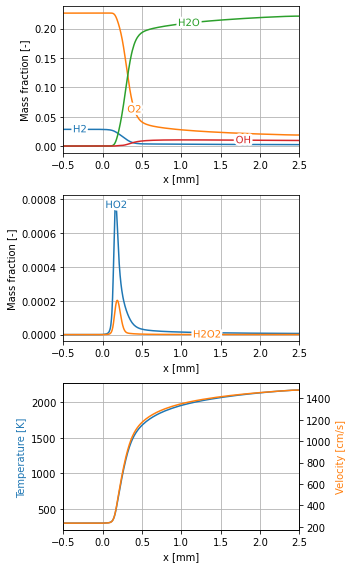

In [8]:
major_species = ['H2', 'O2', 'H2O', 'OH']
minor_species = ['HO2', 'H2O2']
grid = f.grid*1000-1.

fig, ax = plt.subplots(3, figsize=(5,8))
# Plot major species
for sp in major_species:
  ax[0].plot(grid, f.Y[gas.species_index(sp)], label=sp)
labelLines(ax[0].get_lines(), align=False)

ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('Mass fraction [-]')
ax[0].set_xlim([-0.5, 2.5])
ax[0].grid(which='major')

# Plot minor species
for sp in minor_species:
  ax[1].plot(grid, f.Y[gas.species_index(sp)], label=sp)
labelLines(ax[1].get_lines(), align=False)

ax[1].set_xlabel('x [mm]')
ax[1].set_ylabel('Mass fraction [-]')
ax[1].set_xlim([-0.5, 2.5])
ax[1].grid(which='major')

# Plot temperature and velocity
ax[2].plot(grid, f.T)
ax[2].set_xlabel('x [mm]')
ax[2].set_ylabel('Temperature [K]', color='C0')
ax[2].set_xlim([-0.5, 2.5])
ax[2].grid(which='major')

ax2 = ax[2].twinx()
ax2.plot(grid, f.velocity*100, color='C1')
ax2.set_ylabel('Velocity [cm/s]', color='C1')
print(f.velocity[0])

plt.tight_layout()

In [5]:
print("T(burnt) = ", f.T[-1])
print("rho(unburnt) = ", f.density[0], "rho(burnt) = ", f.density[-1])
print("vel(unburnt) = ", f.velocity[0], "vel(burnt) = ", f.velocity[-1])
print("int_energy(unburnt) = ", f.int_energy[0], "int_energy(burnt) = ", f.int_energy[-1])

T(burnt) =  2169.8013349457797
rho(unburnt) =  0.8494721394837322 rho(burnt) =  0.13430900961375505
vel(unburnt) =  2.336766568266508 vel(burnt) =  14.779485731992894
int_energy(unburnt) =  -116671.84351781593 int_energy(burnt) =  -748306.9422316741
